In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
import seaborn as sns

In [2]:
df_r = pd.read_csv('Admission_predict_ver1.csv')
print(df_r)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [3]:
df_r.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
x = df_r.iloc[:,1:-1].values
y = df_r.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=180,max_depth=6,random_state=0)
rfr.fit(x_tr,y_tr)
y_pred=rfr.predict(x_te)
rfr

RandomForestRegressor(max_depth=6, n_estimators=180, random_state=0)

In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
Y_pred = rfr.predict(x_te)
mse= mean_squared_error(y_te,y_pred)
rmse=np.sqrt(mse)
print("Mean squared error:",mse)
print("Mean absolute error:",mean_absolute_error(y_te,Y_pred))
print("Root mean squared error:",np.sqrt(mse))
print("R-Square:",r2_score(y_te,y_pred))

Mean squared error: 0.0037846456870286893
Mean absolute error: 0.04251481656018558
Root mean squared error: 0.06151947404707463
R-Square: 0.7992306409541605


In [9]:
print(Y_pred)

[0.64896216 0.8410271  0.77665325 0.87578308 0.63010921 0.66650676
 0.54236917 0.67118225 0.55686796 0.72954625 0.62871237 0.71822876
 0.64946336 0.78606935 0.88297195 0.54067699 0.80858531 0.64839188
 0.75796955 0.55268348 0.48877321 0.72614701 0.55020646 0.92477583
 0.85812945 0.71190447 0.65254248 0.52372013 0.61453444 0.63170548
 0.72207043 0.44957983 0.6593148  0.83047916 0.59647586 0.56245119
 0.84268213 0.90133059 0.64379785 0.6862992  0.68327464 0.9072315
 0.8903133  0.70016387 0.74649253 0.80452652 0.95902938 0.816706
 0.61135854 0.68089282 0.66493033 0.63808328 0.64245828 0.8025875
 0.69504404 0.83760435 0.54450055 0.88505076 0.63517747 0.67035411
 0.43040841 0.92248284 0.64337995 0.9422816  0.73428126 0.66012583
 0.7284973  0.8440209  0.50111284 0.73446296 0.92052904 0.7823144
 0.68238046 0.63984544 0.80129148 0.91722163 0.75951947 0.72790389
 0.52457708 0.67666181 0.61305964 0.89172594 0.5578173  0.69147354
 0.77559347 0.56695827 0.80698529 0.65601566 0.47954547 0.63248483


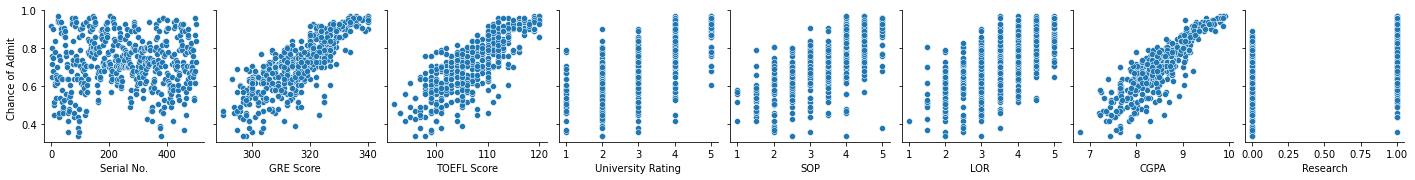

In [10]:
sns.pairplot(df_r,x_vars=['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research'],y_vars=['Chance of Admit '])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

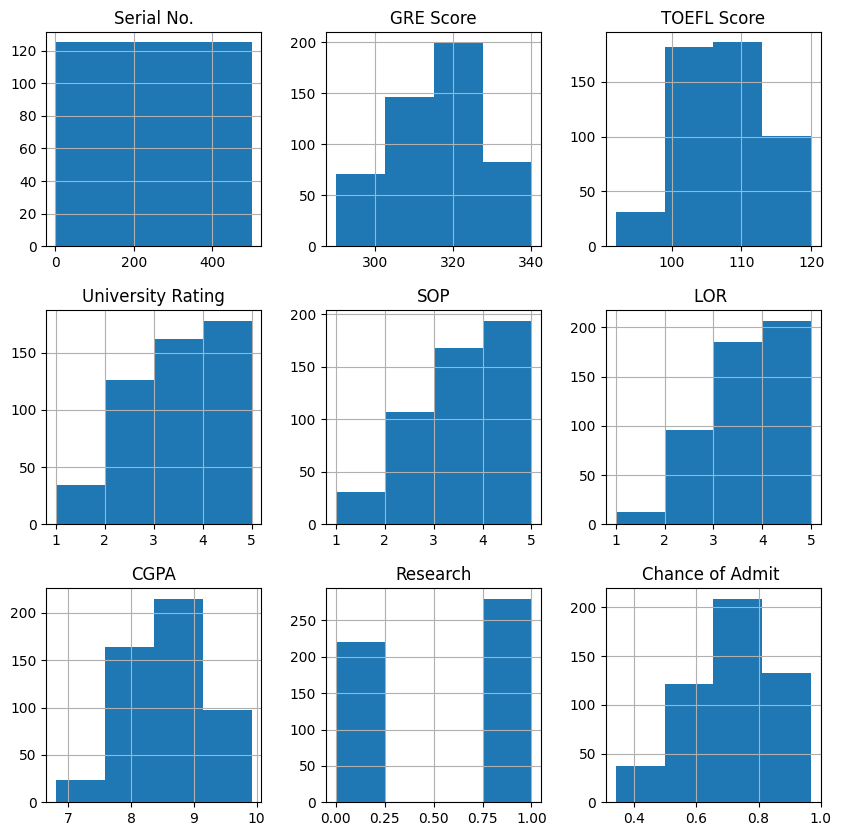

In [12]:
df_r.hist(bins=4,figsize=(10,10))
plt.show

In [13]:
df_r.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


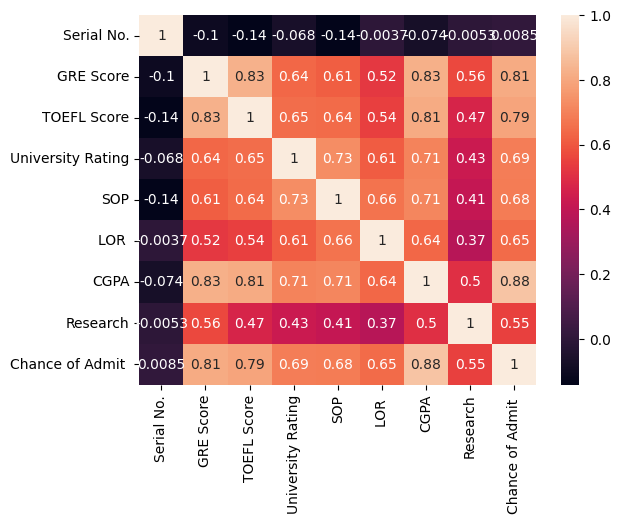

In [14]:
corrMatrix=df_r.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [15]:
rfr_df_r= pd.DataFrame({'Actual':np.array(y_te),'Predicted':Y_pred})

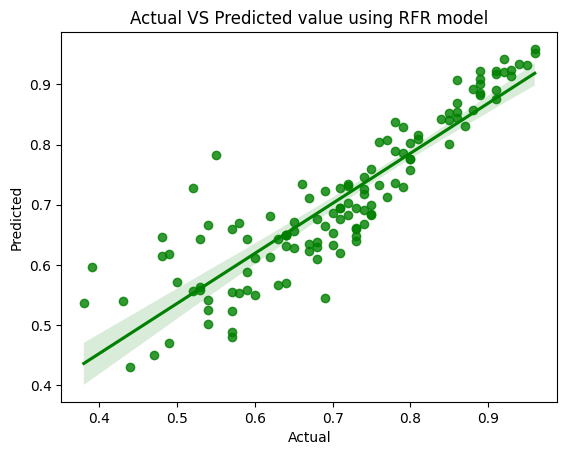

In [16]:
sns.regplot(rfr_df_r['Actual'],rfr_df_r['Predicted'],fit_reg=True,color='green')
plt.title('Actual VS Predicted value using RFR model')
plt.show()